In [1]:
import pandas as pd
import json
from config import *
from ppp_prediction.utils import load_data
from ppp_prediction.model import fit_best_model
import pickle


import matplotlib.pyplot as plt
import seaborn as sns
from ppp_prediction.plot.utils import save_fig

params = {
    "axes.labelsize": 14,  # fontsize for x and y labels (was 10)
    "font.size": 8,  # was 10
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "text.usetex": False,
    "figure.figsize": [5, 5],
    "font.family": "Calibri",
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.linewidth": 2,
    # set title fontsize
    "axes.titlesize": 15,
    "axes.titleweight": "bold",
    "figure.titlesize": 15,
    # label
    "axes.labelweight": "bold",
}

plt.rcParams.update(params)

%config InlineBackend.figure_format = "svg"
%config InlineBackend.print_figure_kwargs = {"dpi" : 300}



/deeplearning/xutingfeng/miniforge3/envs/ml/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
2025-02-13 10:02:12,695	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-02-13 10:02:12,820	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-02-13 10:02:12,892	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
diseaserawDir = dataDir / "label"
modelSaveDir = outputDir / "0x-tabpfn"


def get_predict_v2_from_df(
    model,
    data,
    x_var,
):
    """
    merge by idx
    """

    no_na_data = data[x_var].dropna().copy()
    if hasattr(model, "predict_proba"):
        no_na_data["pred"] = model.predict_proba(no_na_data)[:, 1]
    else:
        no_na_data["pred"] = model.predict(no_na_data)

    return (
        data[[]]
        .merge(no_na_data[["pred"]], left_index=True, right_index=True, how="left")
        .values.flatten()
    )

In [3]:
clinical_risk_dict = json.loads(open(dataDir / "clinical_risk_dict.json").read())
clinical_risk_dict["AgeSex"] = ["age", "sex"]
clinical_risk_dict

{'ASCVD': ['age',
  'sex',
  'cholesterol',
  'hdl_cholesterol',
  'systolic_blood_pressure_medical_adjust',
  'antihypertensives',
  'diabetes2',
  'smoking_status'],
 'FINDRISC': ['age',
  'sex',
  'daily_physical_activity',
  'fh_diabetes',
  'body_mass_index_bmi',
  'waist_circumference',
  'antihypertensives'],
 'CAIDE': ['age',
  'sex',
  'daily_physical_activity',
  'education_years',
  'body_mass_index_bmi',
  'cholesterol'],
 'PANEL': ['body_mass_index_bmi',
  'waist_hip_ratio',
  'waist_circumference',
  'weight',
  'standing_height',
  'systolic_blood_pressure_medical_adjust',
  'cholesterol',
  'ldl_direct_medical_adjust',
  'hdl_cholesterol',
  'triglycerides_medical_adjust',
  'glucose',
  'glycated_haemoglobin_hba1c',
  'creatinine',
  'cystatin_c',
  'urea',
  'urate',
  'aspartate_aminotransferase',
  'alanine_aminotransferase',
  'alkaline_phosphatase',
  'albumin',
  'creactive_protein',
  'red_blood_cell_erythrocyte_count',
  'white_blood_cell_leukocyte_count',
  'p

In [4]:
# Prot_train = load_data(dataDir / "imputeData" / "Prot_train.feather")
# held_out_train = load_data(dataDir / "imputeData" / "held_out_train.feather")
# held_out_test = load_data(dataDir / "imputeData" / "held_out_test.feather")
# print(RF_train.info())

RF_train = load_data(dataDir / "imputeData" / "RF_train.feather")
held_out_train = load_data(dataDir / "imputeData" / "held_out_train.feather")
held_out_test = load_data(dataDir / "imputeData" / "held_out_test.feather")
print(RF_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473367 entries, 0 to 473366
Data columns (total 46 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   eid                                         473367 non-null  object 
 1   age                                         473367 non-null  Float64
 2   sex                                         473367 non-null  Int64  
 3   smoking_status                              473367 non-null  Int64  
 4   alcohol_intake_frequency                    473367 non-null  Int64  
 5   daily_physical_activity                     473367 non-null  Int64  
 6   education_years                             473367 non-null  float64
 7   daily_healthy_food                          473367 non-null  Int64  
 8   fh_diabetes                                 473367 non-null  Int64  
 9   diabetes2                                   473367 non-null  Int64  
 

## Clinical Model 

In [5]:
RF_train = load_data(dataDir / "imputeData" / "RF_train.feather")
held_out_train = load_data(dataDir / "imputeData" / "held_out_train.feather")
held_out_test = load_data(dataDir / "imputeData" / "held_out_test.feather")
print(RF_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473367 entries, 0 to 473366
Data columns (total 46 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   eid                                         473367 non-null  object 
 1   age                                         473367 non-null  Float64
 2   sex                                         473367 non-null  Int64  
 3   smoking_status                              473367 non-null  Int64  
 4   alcohol_intake_frequency                    473367 non-null  Int64  
 5   daily_physical_activity                     473367 non-null  Int64  
 6   education_years                             473367 non-null  float64
 7   daily_healthy_food                          473367 non-null  Int64  
 8   fh_diabetes                                 473367 non-null  Int64  
 9   diabetes2                                   473367 non-null  Int64  
 

In [6]:
dataDir

PosixPath('V4/data')

In [7]:
print(RF_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473367 entries, 0 to 473366
Data columns (total 46 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   eid                                         473367 non-null  object 
 1   age                                         473367 non-null  Float64
 2   sex                                         473367 non-null  Int64  
 3   smoking_status                              473367 non-null  Int64  
 4   alcohol_intake_frequency                    473367 non-null  Int64  
 5   daily_physical_activity                     473367 non-null  Int64  
 6   education_years                             473367 non-null  float64
 7   daily_healthy_food                          473367 non-null  Int64  
 8   fh_diabetes                                 473367 non-null  Int64  
 9   diabetes2                                   473367 non-null  Int64  
 

In [8]:



def get_predict_v2_from_df(
    model,
    data,
    x_var,
):
    """
    merge by idx
    """

    no_na_data = data[x_var].dropna().copy()
    if hasattr(model, "predict_proba"):
        no_na_data["pred"] = model.predict_proba(no_na_data)[:, 1]
    else:
        no_na_data["pred"] = model.predict(no_na_data)

    return (
        data[[]]
        .merge(no_na_data[["pred"]], left_index=True, right_index=True, how="left")
        .values.flatten()
    )

In [9]:
drop_dict = {
    "T2D": ["Glucose", "glucose", "glycated_haemoglobin_hba1c"],
    "Stroke": None,
    "Heart_Failure": None,
    "Coronary_Artery_Disease": None,
    "Chronic_kidney_disease": ["Creatinine", "creatinine"],
    "Atrial_fibrillation_or_flutter": None,
    "PAD": None,
    "Hypertension": None,
    "Venous_Thromboembolism": None,
    "CMD": ["Creatinine", "creatinine", "Glucose", "glucose"],
}


def drop_value_from_list(l, v=None):
    if v is None:
        return l
    if len(v) == 0:
        return l
    will_drop = []
    will_keep = []
    for i in l:
        if i in v:
            will_drop.append(i)
        else:
            will_keep.append(i)
    print(f"will drop {will_drop}")
    return will_keep
    # will_drop.extend(drop_dict[i])

In [10]:
list(diseaserawDir.glob("*"))

[PosixPath('V4/data/label/Coronary_Artery_Disease.feather'),
 PosixPath('V4/data/label/Heart_Failure.feather'),
 PosixPath('V4/data/label/Hypertension.feather'),
 PosixPath('V4/data/label/Stroke.feather'),
 PosixPath('V4/data/label/Atrial_fibrillation_or_flutter.feather'),
 PosixPath('V4/data/label/Chronic_kidney_disease.feather'),
 PosixPath('V4/data/label/PAD.feather'),
 PosixPath('V4/data/label/Venous_Thromboembolism.feather'),
 PosixPath('V4/data/label/T2D.feather')]

In [11]:
from ppp_prediction.model_v2.models import (
    fit_best_model_v2,
    fit_ensemble_model_simple_v2,
    fit_lightgbm,
    fit_xgboost,
)

In [13]:
from collections import defaultdict
from ppp_prediction.cox import run_cox

# from ppp_prediction.model import run_glmnet
E = "incident"
T = "survTime"
disease_dict = defaultdict(dict)
for disease_dir in diseaserawDir.glob("*"):
    disease_name = disease_dir.stem


    disease_df = load_data(disease_dir)

    disease_train = disease_df.merge(RF_train, on="eid", how="inner")
    disease_data_held_out_train = disease_df.merge(
        held_out_train, on="eid", how="inner"
    )
    disease_data_held_out_test = disease_df.merge(held_out_test, on="eid", how="inner")

    disease_modelSaveDir = modelSaveDir / disease_name
    disease_modelSaveDir.mkdir(parents=True, exist_ok=True)

    final_need_cols = ["eid", "incident", "survTime", "date"]
    c_model_dict = {}

    # for name, combination in clinical_risk_dict.items():
    name = "PANEL"
    combination = clinical_risk_dict[name]

    # split data 

    # 1) full data ; 2) random sample data 
    n_case_train = disease_train["incident"].sum()

    disease_train = disease_train.dropna(subset=["incident", *combination])
    disease_train_case = disease_train.query("incident == 1").sample(n=5000 if n_case_train > 5000 else n_case_train)
    disease_train_control = disease_train.query("incident == 0").sample(n=5000)
    disease_train_sample = pd.concat([disease_train_case, disease_train_control])
    X_train = disease_train_sample[combination]
    y_train = disease_train_sample["incident"]
    
    disease_data_held_out_train = disease_data_held_out_train.dropna(
        subset=["incident", *combination]
    )
    X_held_out_train = disease_data_held_out_train[combination]
    y_held_out_train = disease_data_held_out_train["incident"]

    disease_data_held_out_test = disease_data_held_out_test.dropna(
        subset=["incident", *combination]
    )
    X_held_out_test = disease_data_held_out_test[combination]
    y_held_out_test = disease_data_held_out_test["incident"]


    # Test model; 1) xgboost; 2) lasso  ;3) AutoTabPFN
    break 
    

In [14]:
import pickle 

model = pickle.load(open(disease_modelSaveDir / "AutoTabPFN.pkl", "rb"))
model 

In [19]:
model.device

'cuda'

In [23]:
sample_test = disease_train_sample.groupby("incident").sample(10)
sample_test 

,eid,event,incident,prevalent,survTime,date,recuit_date,followTime,event_age,age,...,mean_corpuscular_haemoglobin,mean_corpuscular_volume,mean_corpuscular_haemoglobin_concentration,antihypertensives,PhysicalActivity,HealthyDiet,Alcohol consumption,Sedentary_behaviour,Sleep_duration,RT_init
154109,2636527,0.0,0.0,0.0,14.964384,NaT,2009-01-17,14.964384,69.046575,53.0,...,34.04,90.41,37.65,0,0,1,1,1,1,496.0
102582,2090023,0.0,0.0,0.0,15.435616,NaT,2008-07-29,15.435616,61.041096,45.0,...,22.70,68.10,33.40,0,0,1,1,1,1,508.0
112338,2193299,0.0,0.0,0.0,13.589041,NaT,2010-06-03,13.589041,75.049315,60.0,...,31.81,94.03,33.83,0,0,1,1,1,1,590.0
257748,3735962,0.0,0.0,0.0,16.186301,NaT,2007-10-29,16.186301,75.049315,58.0,...,30.90,91.30,33.80,0,0,0,1,1,1,676.0
383132,5065939,0.0,0.0,0.0,15.432877,NaT,2008-07-30,15.432877,65.043836,48.0,...,30.70,86.40,35.50,0,0,1,1,1,1,469.0
66237,1703738,0.0,0.0,0.0,15.871233,NaT,2008-02-21,15.871233,86.057534,69.0,...,31.70,90.30,35.10,0,0,1,1,1,0,562.0
187263,2988763,0.0,0.0,0.0,15.205479,NaT,2008-10-21,15.205479,79.052055,63.0,...,33.63,93.65,35.91,0,0,0,0,1,0,508.0
294214,4122677,0.0,0.0,0.0,14.479452,NaT,2009-07-13,14.479452,71.046575,56.0,...,30.05,86.01,34.94,0,0,1,1,1,1,445.0
80458,1855184,0.0,0.0,0.0,15.158904,NaT,2008-11-07,15.158904,62.041096,46.0,...,31.78,87.18,36.46,0,0,0,0,1,1,401.0
219225,3328051,0.0,0.0,0.0,15.043836,NaT,2008-12-19,15.043836,68.046575,52.0,...,31.33,87.01,36.01,0,0,1,1,1,1,535.0


In [24]:
X_train

,body_mass_index_bmi,waist_hip_ratio,waist_circumference,weight,standing_height,systolic_blood_pressure_medical_adjust,cholesterol,ldl_direct_medical_adjust,hdl_cholesterol,triglycerides_medical_adjust,...,creactive_protein,red_blood_cell_erythrocyte_count,white_blood_cell_leukocyte_count,platelet_count,haemoglobin_concentration,haematocrit_percentage,mean_corpuscular_haemoglobin,mean_corpuscular_volume,mean_corpuscular_haemoglobin_concentration,antihypertensives
214612,33.2699,0.909091,100.0,106.6,179.0,141.424572,3.707000,3.26700,0.933000,2.149000,...,1.100000,4.660,8.40,279.0,14.20,41.30,30.40,88.60,34.30,0
253549,27.8531,0.961165,99.0,85.3,175.0,142.000000,5.143000,3.13900,1.470000,1.361000,...,1.640000,4.599,5.46,293.6,14.90,43.04,32.41,93.59,34.63,0
374410,25.4367,0.915094,97.0,77.9,175.0,152.000000,5.056000,3.26100,0.835000,4.021000,...,1.020000,4.064,5.93,239.8,13.08,37.92,32.17,93.30,34.48,0
162482,32.4234,0.934579,100.0,75.9,153.0,169.000000,7.570000,5.75900,1.040000,1.284000,...,0.620000,4.540,6.60,308.0,14.80,42.50,32.50,93.70,34.70,0
46874,31.2488,0.905660,96.0,79.0,159.0,132.000000,3.712000,2.84700,1.378000,1.598000,...,1.240000,4.873,7.76,290.2,14.63,43.37,30.01,88.99,33.73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279219,26.1268,0.927083,89.0,64.4,157.0,126.000000,7.447000,4.86400,1.837000,2.062000,...,1.610000,4.130,6.90,220.0,13.00,37.20,31.50,90.20,35.00,0
309993,21.5972,0.944444,85.0,54.6,159.0,168.000000,5.102000,4.10300,1.392000,2.269000,...,1.980000,4.119,6.39,215.6,12.99,37.03,31.53,89.91,35.07,0
89248,24.8712,0.850000,85.0,75.3,174.0,166.000000,6.184000,5.32400,1.593000,2.769000,...,1.180000,4.874,4.55,227.1,15.27,44.14,31.33,90.57,34.59,0
286817,29.6850,0.860000,86.0,81.8,166.0,192.000000,6.022000,3.72600,1.689000,0.798000,...,0.990000,4.365,5.11,142.9,14.37,41.98,32.91,96.18,34.22,0


In [25]:
import shapiq
explainer = shapiq.TabPFNExplainer(   # setup the explainer
    model=model,
    # data=X_train,
    data= sample_test[combination].values,
    labels=sample_test["incident"].values,
    index="FSII",
    # device="cuda",
    
)


2025-02-13 10:16:18 INFO     Using `default` preset for Post Hoc Ensemble.
2025-02-13 10:16:18 INFO     No categorical_feature_indices given. Assuming no categorical features.
/deeplearning/xutingfeng/miniforge3/envs/ml/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/deeplearning/xutingfeng/miniforge3/envs/ml/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
2025-02-13 10:16:18 INFO     Using task type: TaskType.BINARY
2025-02-13 10:16:18 INFO     Obtaining TabPFN models from a random portfolio.
2025-02-13 10:16:24 INFO     Using 100 base models: ['default_tabpfn_model_0', 'random_tabpfn_model_1', 'random_rf_pfn_model_2', 'random_rf_pfn_model_3', 'random_rf_pfn_model_4', 'random_rf_pfn_model_5', 'random_tabpfn_model_6', 'random_tabpfn_model_7', 'random_

In [29]:
sample_test[combination].iloc[0]

body_mass_index_bmi                              30.9413
waist_hip_ratio                                 1.057692
waist_circumference                                110.0
weight                                              95.3
standing_height                                    175.5
systolic_blood_pressure_medical_adjust             126.0
cholesterol                                     5.692447
ldl_direct_medical_adjust                        3.76356
hdl_cholesterol                                 1.447999
triglycerides_medical_adjust                    1.809662
glucose                                         5.125055
glycated_haemoglobin_hba1c                          31.0
creatinine                                     72.308078
cystatin_c                                      0.907544
urea                                            5.403683
urate                                         309.215714
aspartate_aminotransferase                     26.230447
alanine_aminotransferase       

In [28]:
fsii_values = explainer.explain(sample_test[combination].iloc[0].values)  # explain with Faithful Shapley values


/deeplearning/xutingfeng/miniforge3/envs/ml/lib/python3.11/site-packages/shapiq/explainer/tabular.py:187: UserWarning: Using the budget of 2**n_features=1073741824, which might take long                              to compute. Set the `budget` parameter to suppress this warning.


KeyboardInterrupt: 

In [ ]:
fsii_values.plot_force()      

In [ ]:
fsii_values = explainer.explain(X[0])  # explain with Faithful Shapley values
fsii_values.plot_force()               # plot the force plot

## shapiq for tabpfn regress model

> source:https://shapiq.readthedocs.io/en/latest/notebooks/tabular_notebooks/explaining_tabpfn.html#Fit-TabPFN

In [30]:
from importlib.metadata import version
import os

import shapiq
import tabpfn
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("shapiq version: ", shapiq.__version__)
print("tabpfn version: ", version("tabpfn"))
print("Device: ", device)

shapiq version:  1.2.0
tabpfn version:  2.0.5
Device:  cuda


In [31]:
x_data, y_data = shapiq.datasets.load_california_housing()
feature_names = x_data.columns

# copy the data to make sure we don't modify the original data
dataset = x_data.copy()
dataset["HousePrice"] = y_data
display(dataset.head())
display(dataset["HousePrice"].describe())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: HousePrice, dtype: float64

In [32]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_data.values, y_data.values, train_size=500, random_state=42
)
print("Train data shape: ", x_train.shape, y_train.shape)
print("Test data shape: ", x_test.shape, y_test.shape)

Train data shape:  (500, 8) (500,)
Test data shape:  (20140, 8) (20140,)


In [33]:
model = tabpfn.TabPFNRegressor(n_jobs=7, device=device)
model.fit(x_train, y_train)

TabPFNRegressor(device=device(type='cuda'), n_jobs=7)

In [34]:
# we downsample the test data for more efficient inference
x_test, y_test = x_test[:2000], y_test[:2000]
predictions = model.predict(x_test)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("MSE: ", mse, "R2: ", r2)

average_prediction = np.mean(predictions)
print("Average prediction: ", average_prediction)

MSE:  0.2714551661679461 R2:  0.7964233617875383
Average prediction:  2.087179


In [36]:
# we will reset the model to less training data because we are on CPU
if device == torch.device("cpu"):
    print("Resetting the model to less training data:", x_train.shape[0])
    x_train, y_train = x_train[:50], y_train[:50]
    model.fit(x_train, y_train)

In [37]:
x_explain = x_data.values[1000]
y_explain = y_data.values[1000]

prediction = model.predict(x_explain.reshape(1, -1))[0]
print("Prediction: ", prediction)
print("True value: ", y_explain)
print("Average prediction: ", average_prediction)

Prediction:  1.6014657
True value:  1.844
Average prediction:  2.087179


In [43]:
explainer = shapiq.Explainer(
    model=model,
    data=x_train,
    labels=y_train,
    index="SV",  # Shapley values
    max_order=1,  # first order Shapley values
    empty_prediction=float(average_prediction),  # Optional, can also be inferred from the model
)
print(f"Explainer Class: {explainer.__class__.__name__} inferred from the model.")

Explainer Class: TabPFNExplainer inferred from the model.


In [44]:
imputer = explainer._imputer
if not os.path.exists("tabpfn_values_explainer.npz"):
    imputer.verbose = True  # see the pre-computation progress
    imputer.fit(x_explain)
    imputer.precompute()
    imputer.save_values("tabpfn_values_explainer.npz")
imputer.load_values("tabpfn_values_explainer.npz")

Evaluating game: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 256/256 [02:56<00:00,  1.45 coalition/s]


{(): 2.087178945541382,
 (0,): -0.252977971990028,
 (1,): -0.05364075464586308,
 (2,): -0.26954623304939157,
 (3,): 0.03760511579011739,
 (4,): 0.03014463373984735,
 (5,): 0.038291336914670834,
 (6,): 0.02362475687189411,
 (7,): -0.03921412732995319}

2025-02-13 10:55:15 WARNING  findfont: Font family 'Calibri' not found.
2025-02-13 10:55:15 WARNING  findfont: Font family 'Calibri' not found.
2025-02-13 10:55:15 WARNING  findfont: Font family 'Calibri' not found.
2025-02-13 10:55:15 WARNING  findfont: Font family 'Calibri' not found.
2025-02-13 10:55:15 WARNING  findfont: Font family 'Calibri' not found.
2025-02-13 10:55:15 WARNING  findfont: Font family 'Calibri' not found.
2025-02-13 10:55:15 WARNING  findfont: Font family 'Calibri' not found.
2025-02-13 10:55:15 WARNING  findfont: Font family 'Calibri' not found.
2025-02-13 10:55:15 WARNING  findfont: Font family 'Calibri' not found.
2025-02-13 10:55:15 WARNING  findfont: Font family 'Calibri' not found.
2025-02-13 10:55:15 WARNING  findfont: Font family 'Calibri' not found.
2025-02-13 10:55:15 WARNING  findfont: Font family 'Calibri' not found.
2025-02-13 10:55:15 WARNING  findfont: Font family 'Calibri' not found.
2025-02-13 10:55:15 WARNING  findfont: Font family 'Calibri' not

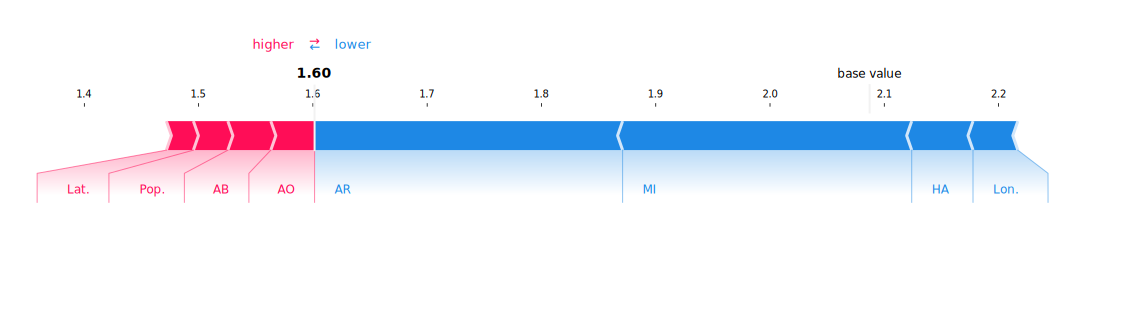

In [45]:
shapley_values = explainer.explain(x_explain)
display(shapley_values.dict_values)
shapley_values.plot_force(feature_names=feature_names)